## 強化学習　１：基本的なもの
---

参考：  
[OpenAI Gym Documentation](https://gym.openai.com/docs/)  
[OpenAI GymをJupyter notebookで動かすときの注意点一覧](https://qiita.com/mittyantest/items/2ea07b0f8d5976f29da9)  
[matplotlibのanimation.FuncAnimationを用いて柔軟にアニメーション作成](https://qiita.com/AnchorBlues/items/3acd37331b12e844d259)  

### OpenAI Gymのenvironmentを立ち上げる

#### 環境：CartPole-v0　（倒立振り子問題）
>A pole is attached by an un-actuated joint to a cart, which moves along a frictionless track. The system is controlled by applying a force of +1 or -1 to the cart. The pendulum starts upright, and the goal is to prevent it from falling over. A reward of +1 is provided for every timestep that the pole remains upright. The episode ends when the pole is more than 15 degrees from vertical, or the cart moves more than 2.4 units from the center.
  
倒立振り子問題は強化学習における古典的課題の一つで、  
台車の上に立てられた棒を倒さないように長く維持する、  
または倒れた状態から振り上げて静止させることを目標とする。  
  
ここで使用するCartPole-v0では  
前後にのみ動く台車と、それと平行な方向でのみ角度を変えられる棒があり、  
はじめ垂直に立っている棒を維持した時間に比例して報酬が与えられる。  
この条件のもとで、強化学習のAgentは報酬を最大にすることを試みる。  
  
Agentは台車に+1または-1の力を加えることができる。  
棒を垂直から15度以上倒してしまったり、台車が自身の2.4倍以上横に動いてしまったら終了となる。  

[2017-10-19 11:47:40,174] Making new env: CartPole-v0


Episode finished after 14 timesteps


<IPython.core.display.Javascript object>


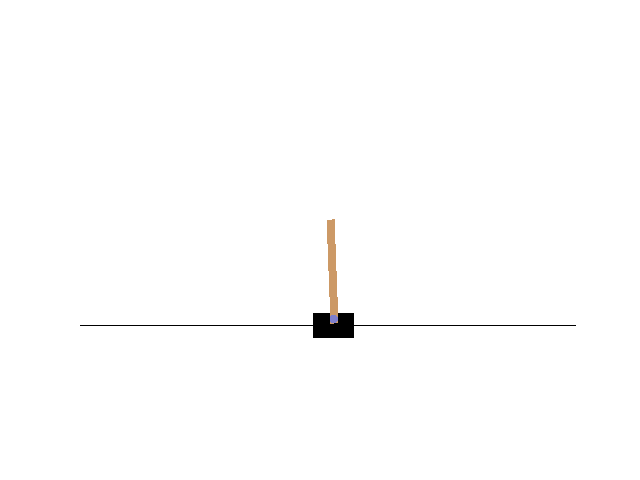

In [17]:
# mittyantestさんのcodeを少しだけ改変
# 行動はランダムに選択されている
import gym
import matplotlib.pyplot as plt
import matplotlib.animation as animation
% matplotlib nbagg

env = gym.make('CartPole-v0')
observation = env.reset()
frames = []

for _ in range(5000):
    frames.append(env.render(mode='rgb_array'))
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    if done:
        print("Episode finished after {0} timesteps".format(_+1))
        break
env.render(close=True)

fig = plt.gcf()
patch = plt.imshow(frames[0])
plt.axis('off')

def animate(i):
    patch.set_data(frames[i])

ani = animation.FuncAnimation(fig, animate, frames = len(frames), interval=75)
ani


---
Gymのenv.step(action)は以下の値を返す。  
　・observation (object)  
　　　環境の情報。environmentによって異なり、画像データ、関節の角度と速度などがある。  
　・reward (float)  
　　　actionによる報酬。  
　・done (boolean)  
　　　エピソードが終了したときTrueとなる。  
　・info (dict)  
　　　デバッグ用の情報。  
   

また、Gymの各環境におけるActionの選択肢やobservationについては  
次のように調べることができる。

In [12]:
env = gym.make('CartPole-v0')
print(env.action_space)

[2017-10-19 11:31:02,109] Making new env: CartPole-v0


Discrete(2)


action_spaceは2種類（0,1)の選択肢があり、Discrete = 非ゼロの入力ができる。

In [14]:
print(env.observation_space)
print(env.observation_space.high)
print(env.observation_space.low)

Box(4,)
[  4.80000000e+00   3.40282347e+38   4.18879020e-01   3.40282347e+38]
[ -4.80000000e+00  -3.40282347e+38  -4.18879020e-01  -3.40282347e+38]


この場合、環境は4つの値からなる。

---